 # Player's accounts<font color=black></font>


In [80]:
import numpy as np
import pandas as pd
#read users data
df = pd.read_csv("user.csv")

df

,ID,Area,City,Gender,BirthYear,PDGA,CountryCode,MetrixRating,MetrixRating2,PDGAMembershipStatus,CreatedOn,LastFinishedRoundOn,DeletedOn
0,1,Harjumaa,Kiili vald,M,1976.0,70804.0,EE,829.0,825.0,current,2012-05-01 00:00,2023-09-19 16:02:40,NaN
1,2,NaN,NaN,M,1983.0,57284.0,FI,0.0,0.0,NaN,2018-03-01 21:51,2020-07-09 17:17:37,NaN
2,3,NaN,NaN,M,2005.0,NaN,FI,0.0,0.0,NaN,2019-10-27 22:25,2020-07-09 17:17:37,NaN
3,9,Pärnumaa,Paikuse,M,1975.0,51683.0,EE,981.0,982.0,current,2012-06-02 00:00,2023-11-05 14:10:59,NaN
4,10,Uusimaa,Vantaa,M,1967.0,47270.0,EE,874.0,860.0,current,2012-06-27 00:00,2023-11-15 19:17:13,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185676,194623,NaN,Panev?žys,M,1945.0,NaN,LT,NaN,NaN,NaN,2023-11-22 13:04,2023-11-22 14:02:29,NaN
185677,194624,?????,?????,F,1993.0,NaN,IR,NaN,NaN,NaN,2023-11-22 14:08,NaN,NaN
185678,194625,Bourgogne-Franche-Comté,Auxerre,M,1996.0,270933.0,FR,NaN,NaN,NaN,2023-11-22 16:16,NaN,NaN
185679,194626,NaN,Jyväskylä,F,1975.0,NaN,FI,NaN,NaN,NaN,2023-11-22 16:19,NaN,NaN


In [81]:
#only take estonian players
data_E = df[df["CountryCode"]=="EE"]
#filter out false data
data_E = data_E[(data_E["BirthYear"]>1900) & (data_E["BirthYear"]<2025)]
data_E

,ID,Area,City,Gender,BirthYear,PDGA,CountryCode,MetrixRating,MetrixRating2,PDGAMembershipStatus,CreatedOn,LastFinishedRoundOn,DeletedOn
0,1,Harjumaa,Kiili vald,M,1976.0,70804.0,EE,829.0,825.0,current,2012-05-01 00:00,2023-09-19 16:02:40,NaN
3,9,Pärnumaa,Paikuse,M,1975.0,51683.0,EE,981.0,982.0,current,2012-06-02 00:00,2023-11-05 14:10:59,NaN
4,10,Uusimaa,Vantaa,M,1967.0,47270.0,EE,874.0,860.0,current,2012-06-27 00:00,2023-11-15 19:17:13,NaN
5,11,Harjumaa,"Harjumaa, Keila linn,",M,1984.0,49264.0,EE,888.0,883.0,current,2012-06-07 16:06,2023-08-16 20:02:01,NaN
6,12,NaN,Pärnu,M,1988.0,51689.0,EE,968.0,975.0,expired,2012-06-07 19:32,2023-09-17 12:40:09,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
185605,194551,Estonian,Tapa,M,2011.0,NaN,EE,NaN,NaN,NaN,2023-11-18 13:25,2023-11-18 15:45:29,NaN
185613,194559,Harju maakond,Kütke,M,1980.0,NaN,EE,NaN,NaN,NaN,2023-11-18 18:50,2023-11-19 16:01:36,NaN
185661,194608,Tartumaa (Tartu),Tartu linn,M,1978.0,NaN,EE,NaN,NaN,NaN,2023-11-21 17:24,NaN,NaN
185666,194613,Vilandi maakond,Viljandi vald,M,1984.0,NaN,EE,NaN,NaN,NaN,2023-11-21 20:06,NaN,NaN


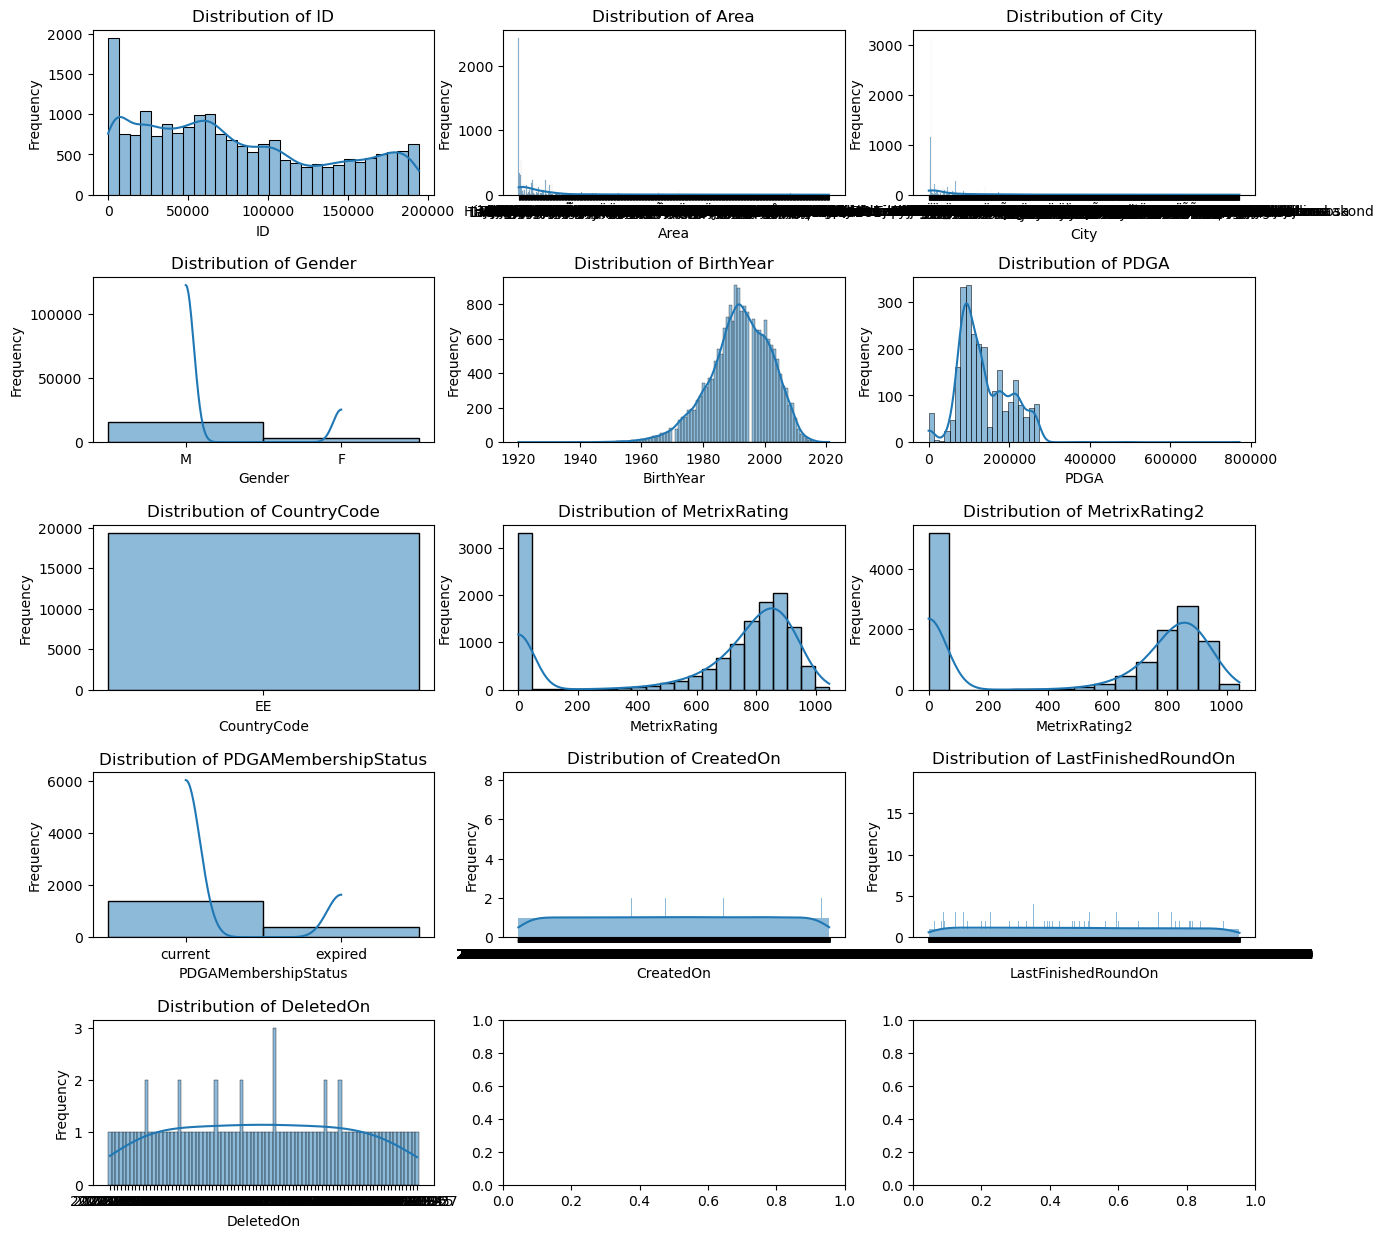

In [82]:
import matplotlib.pyplot as plt

import seaborn as sns

#plot all the attributes to have a better understanding the data
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 15))
fig.subplots_adjust(hspace=0.5)

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Loop through each attribute and plot the distribution
for i, attribute in enumerate(data_E.columns):
    if i < 13:  # Ensure we only plot for the first 13 attributes
        sns.histplot(data_E[attribute], ax=axes[i], kde=True)
        axes[i].set_title(f'Distribution of {attribute}')
        axes[i].set_xlabel(attribute)
        axes[i].set_ylabel('Frequency')
    else:
        # If there are more than 13 attributes, leave the extra subplots blank
        fig.delaxes(axes[i])

# Show the plots
plt.show()

0         2012-05
3         2012-06
4         2012-06
5         2012-06
6         2012-06
           ...   
185605    2023-11
185613    2023-11
185661    2023-11
185666    2023-11
185667    2023-11
Name: YearMonth, Length: 19399, dtype: object


C:\Users\karmo\AppData\Local\Temp\ipykernel_29844\1984927410.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  account_counts["NumAccounts"][i] += account_counts["NumAccounts"][i-1]


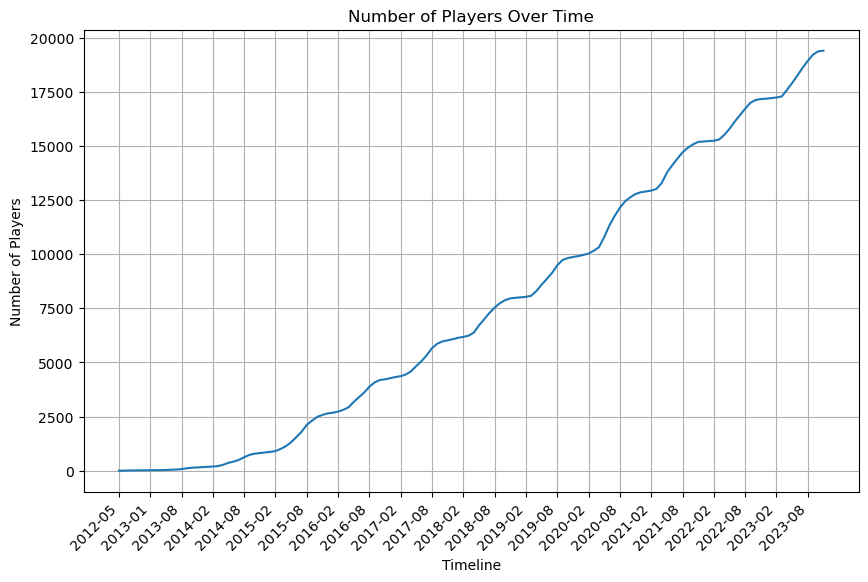

In [83]:
#plot number of players over time
import matplotlib.pyplot as plt
# groupby months
data_E['CreatedOn'] = pd.to_datetime(data_E['CreatedOn'])

data_E['YearMonth'] = data_E['CreatedOn'].dt.to_period('M').astype(str)

account_counts = data_E.groupby('YearMonth').size().reset_index(name='NumAccounts')
#for loop to get number of accounts over time
for i in range(1,len(account_counts)):
    account_counts["NumAccounts"][i] += account_counts["NumAccounts"][i-1]

print(data_E['YearMonth'])
plt.figure(figsize=(10, 6))
plt.plot(account_counts['YearMonth'], account_counts['NumAccounts'])
n = 6
plt.xticks(range(0, len(account_counts['YearMonth']), n), account_counts['YearMonth'][::n], rotation=45, ha='right')
plt.title('Number of Players Over Time')
plt.xlabel('Timeline')
plt.ylabel('Number of Players')
plt.grid(True)
plt.show()

541
2020-06


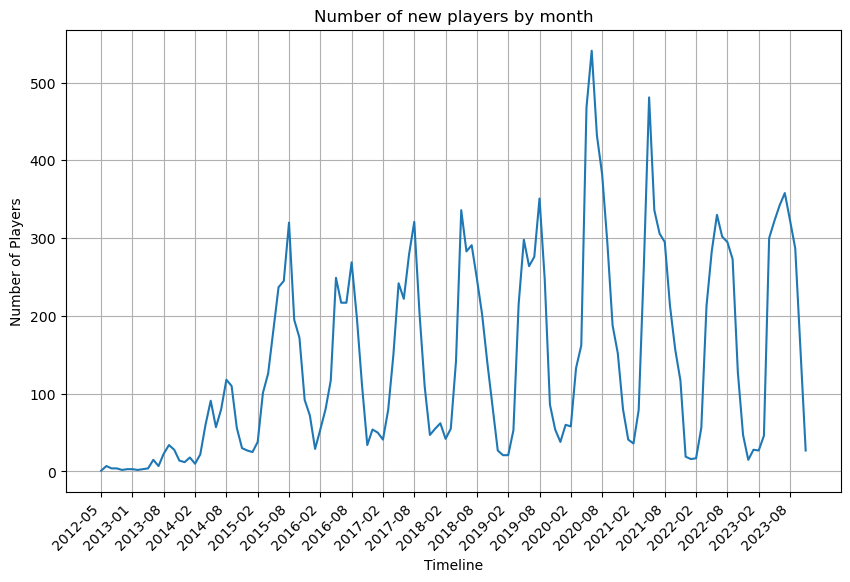

In [84]:
#find out which month has the most users added
data_E['CreatedOn'] = pd.to_datetime(data_E['CreatedOn'])

data_E['YearMonth'] = data_E['CreatedOn'].dt.to_period('M').astype(str)

account_counts = data_E.groupby('YearMonth').size().reset_index(name='NumAccounts')
nr = 0
month = 0

for i in range(1,len(account_counts)):
    if(account_counts["NumAccounts"][i]>nr):
        nr = account_counts["NumAccounts"][i]
        month = account_counts["YearMonth"][i]
print(nr)
print(month)

plt.figure(figsize=(10, 6))
plt.plot(account_counts['YearMonth'], account_counts['NumAccounts'])
n = 6
plt.xticks(range(0, len(account_counts['YearMonth']), n), account_counts['YearMonth'][::n], rotation=45, ha='right')
plt.title('Number of new players by month')
plt.xlabel('Timeline')
plt.ylabel('Number of Players')
plt.grid(True)
plt.show()

C:\Users\karmo\AppData\Local\Temp\ipykernel_29844\1339538908.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_E_MW['CreatedOn'] = pd.to_datetime(data_E_MW['CreatedOn'])
C:\Users\karmo\AppData\Local\Temp\ipykernel_29844\1339538908.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_E_MW['YearMonth'] = data_E_MW['CreatedOn'].dt.to_period('M').astype(str)
C:\Users\karmo\AppData\Local\Temp\ipykernel_29844\1339538908.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

Gender YearMonth     F      M
0        2012-05   0.0    1.0
1        2012-06   0.0    7.0
2        2012-07   0.0    4.0
3        2012-09   1.0    3.0
4        2012-11   0.0    2.0
..           ...   ...    ...
131      2023-07  69.0  289.0
132      2023-08  54.0  269.0
133      2023-09  47.0  240.0
134      2023-10  17.0  139.0
135      2023-11   2.0   25.0

[136 rows x 3 columns]


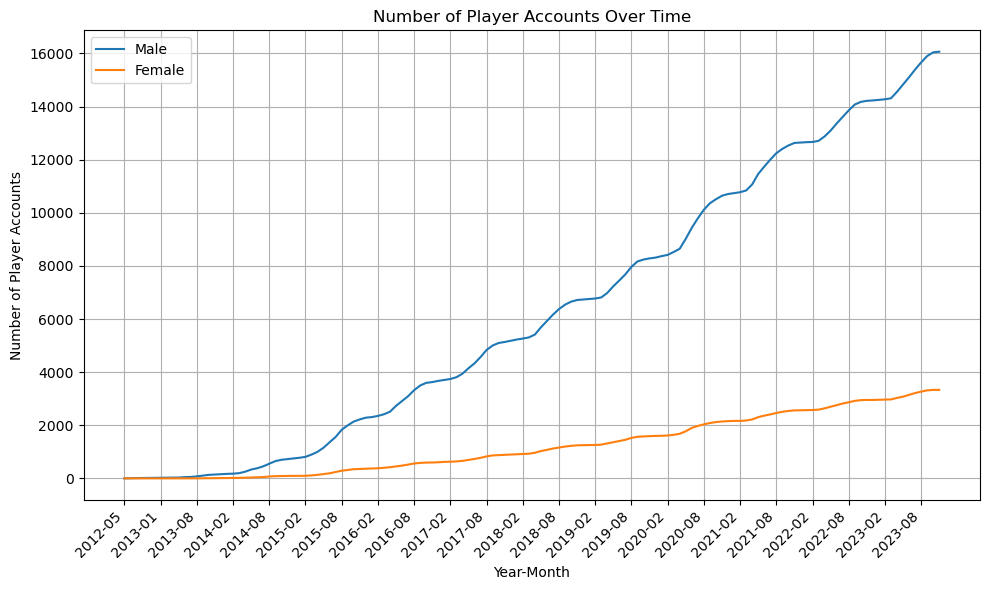

In [85]:
#plot number of players over time but get females and males seperately
data_E_MW = df[df["CountryCode"]=="EE"]

data_E_MW['CreatedOn'] = pd.to_datetime(data_E_MW['CreatedOn'])
data_E_MW['YearMonth'] = data_E_MW['CreatedOn'].dt.to_period('M').astype(str)
account_counts = data_E.groupby(['YearMonth', 'Gender']).size().unstack().reset_index()
account_counts.fillna(0, inplace=True)
print(account_counts)
for i in range(1,len(account_counts)):
    account_counts["M"][i] += account_counts["M"][i-1]
    account_counts["F"][i] += account_counts["F"][i-1]

plt.figure(figsize=(10, 6))
plt.plot(account_counts['YearMonth'], account_counts['M'],  label='Male')
plt.plot(account_counts['YearMonth'], account_counts['F'],  label='Female')

plt.title('Number of Player Accounts Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Number of Player Accounts')

# Display every n-th label for better spacing
n = 6
plt.xticks(range(0, len(account_counts['YearMonth']), n), account_counts['YearMonth'][::n], rotation=45, ha='right')

plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()


# Competion data

In [86]:
#read competition data
voistlused = pd.read_csv("voistluste_arv.csv")
voistlused

,UserID,VoistlusteArv
0,1,487
1,9,1575
2,10,886
3,11,369
4,12,525
...,...,...
18233,194653,1
18234,194662,1
18235,194664,1
18236,194674,1


In [87]:
# merge 2 tables to get nr of competion and MetrixRating in the same table
voistlused = voistlused.rename(columns = {'UserID' : 'ID'})
voistlused = pd.merge(voistlused, data_E[["ID", "MetrixRating"]], how='inner', on=["ID"])
#filter data
voistlused = voistlused.dropna()

voistlused = voistlused[voistlused["VoistlusteArv"] < 2000]
voistlused = voistlused[voistlused["MetrixRating"] > 1]
voistlused

,ID,VoistlusteArv,MetrixRating
0,1,487,829.0
1,9,1575,981.0
2,10,886,874.0
3,11,369,888.0
4,12,525,968.0
...,...,...,...
13451,192927,18,833.0
13466,193302,7,550.0
13470,193407,3,766.0
13472,193427,14,893.0


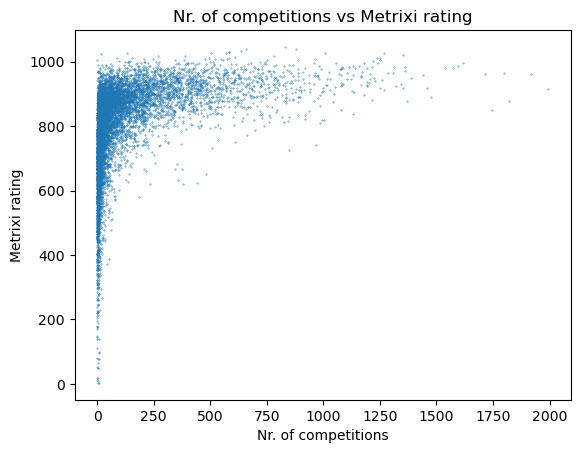

In [88]:
#plot
x_values = voistlused["VoistlusteArv"]
y_values = voistlused["MetrixRating"]


plt.scatter(x_values, y_values, s=0.1)


plt.xlabel('Nr. of competitions')
plt.ylabel('Metrixi rating')
plt.title('Nr. of competitions vs Metrixi rating')


plt.show()

# Competion and ranking correlations

In [89]:
#correlation on Pearson
correlation = voistlused["VoistlusteArv"].corr(voistlused["MetrixRating"])
print("Correlation between VoistlusteArv and MetrixRating:", correlation)

Correlation between VoistlusteArv and MetrixRating: 0.4133011039287408


In [90]:
from scipy.stats import spearmanr

# Calculate Spearman correlation
correlation, p_value = spearmanr(voistlused["VoistlusteArv"], voistlused["MetrixRating"])

print("Spearman correlation between VoistlusteArv and MetrixRating:", correlation)
print("p-value:", p_value)

Spearman correlation between VoistlusteArv and MetrixRating: 0.6698239945254983
p-value: 0.0


# Number of trainings data

In [91]:
#same process for training courses data
treening = pd.read_csv("treeningute_arv.csv")
treening

,UserID,TreeninguteArv
0,1,256
1,9,242
2,10,585
3,11,90
4,12,241
...,...,...
23818,194418,9
23819,194498,1
23820,194551,1
23821,194655,1


In [92]:
treening = treening.rename(columns={"UserID":"ID"})
treening = pd.merge(treening, data_E[["ID", "MetrixRating"]], how='inner', on=["ID"])
treening = treening[treening["MetrixRating"]>1]
treening = treening[treening["TreeninguteArv"]<2000]
treening

,ID,TreeninguteArv,MetrixRating
0,1,256,829.0
1,9,242,981.0
2,10,585,874.0
3,11,90,888.0
4,12,241,968.0
...,...,...,...
16698,192927,2,833.0
16711,193302,2,550.0
16713,193407,14,766.0
16715,193427,3,893.0


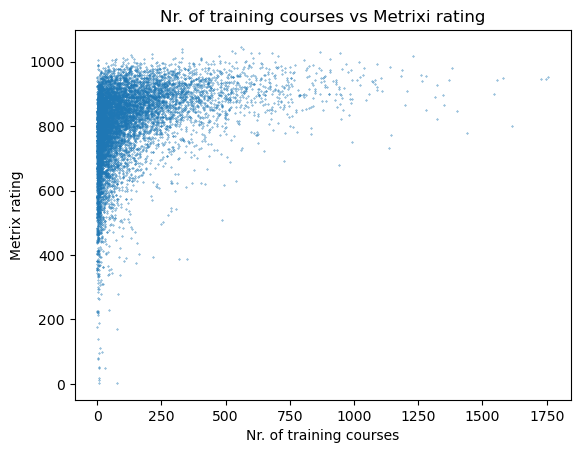

In [93]:
x_values = treening["TreeninguteArv"]
y_values = treening["MetrixRating"]


plt.scatter(x_values, y_values, s=0.1)


plt.xlabel('Nr. of training courses')
plt.ylabel('Metrix rating')
plt.title('Nr. of training courses vs Metrixi rating')


plt.show()

# Correlation between number of training cources and ranking

In [94]:
correlation = treening["TreeninguteArv"].corr(treening["MetrixRating"])
print("Correlation between TreeninguteArv and MetrixRating:", correlation)

Correlation between TreeninguteArv and MetrixRating: 0.36558685570160854


In [95]:
correlation, p_value = spearmanr(treening["TreeninguteArv"], treening["MetrixRating"])

print("Spearman correlation between Treeningute arv and MetrixRating:", correlation)
print("p-value:", p_value)

Spearman correlation between Treeningute arv and MetrixRating: 0.5012290000184582
p-value: 0.0


# Data about courses and heatmaps

In [96]:
#read cources information
cource = pd.read_csv("cource.csv", encoding='utf-8')
cource = cource[cource["CountryCode"]=="EE"]
cource

,ID,CourseID,Name,Fullname,CourseTypeID,CountryCode,State,Area,City,District,...,DGS_ID,LengthM,LocationPoint,ParRating,ApprovalLevel,ApprovalDeadline,ApprovalStatus,ApprovalComment,ApprovedOn,ApprovedBy
0,24,1356.0,Suverada,Otepää &rarr; Suverada,2,EE,NaN,Valga Maakond,Otepää,Nüpli,...,NaN,0.0,NaN,879.00,NaN,NaN,NaN,NaN,NaN,NaN
1,39,1355.0,1x9,Pirgu &rarr; 1x9,2,EE,NaN,Rapla Maakond,Rapla,Pirgu,...,NaN,0.0,NaN,804.24,NaN,NaN,NaN,NaN,NaN,NaN
2,81,1360.0,Võistlusrada,Meegaste &rarr; Võistlusrada,2,EE,NaN,Valga Maakond,Meegaste,Meegaste küla,...,NaN,0.0,NaN,953.70,NaN,NaN,NaN,NaN,NaN,NaN
3,107,17049.0,6 korvi,Seli &rarr; 6 korvi,2,EE,NaN,Rapla Maakond,Rapla,Seli,...,NaN,0.0,NaN,739.20,NaN,NaN,NaN,NaN,NaN,NaN
4,182,NaN,Vastse-Kuuste,Vastse-Kuuste,2,EE,NaN,Võru Maakond,Vastseliina,NaN,...,NaN,0.0,NaN,828.67,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,36502,18923.0,Haapsalu talverada! 2023 (2x10),Haapsalu &rarr; Haapsalu talverada! 2023 (2x10),2,EE,NaN,Lääne Maakond,Haapsalu,Uuemõisa,...,NaN,NaN,NaN,925.00,NaN,NaN,NaN,NaN,NaN,NaN
667,36517,21441.0,Coolbet Järve discgolfipark Talvine OB-ga,Coolbet Järve Discgolfipark &rarr; Coolbet Jär...,2,EE,NaN,Harju Maakond,Tallinn,Kesklinn,...,NaN,NaN,NaN,995.00,area,NaN,2.0,NaN,2023-11-22 08:47:26,1277.0
668,36584,NaN,Viimsi Disc Golf Park ( Talvine Layout ),Viimsi Disc Golf Park ( Talvine Layout ),2,EE,NaN,Harju Maakond,Viimsi,Tammneeme,...,NaN,NaN,NaN,969.00,area,NaN,2.0,NaN,2023-11-29 19:45:33,1.0
669,36602,23818.0,Respo Talverada 2023/24 OB-dega,Respo Discgolfipark 2021 &rarr; Respo Talvera...,2,EE,NaN,Tartu Maakond,Kambja,Tõrvandi,...,NaN,NaN,NaN,899.86,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:

cource.columns


Index(['ID', 'CourseID', 'Name', 'Fullname', 'CourseTypeID', 'CountryCode',
       'State', 'Area', 'City', 'District', 'Street', 'Location', 'UserID',
       'AccessLevel', 'SSA', 'RatingX1', 'RatingY1', 'RatingX2', 'RatingY2',
       'IsRatingCalculated', 'LockRating', 'LocationX', 'LocationY', 'HasMap',
       'EndDate', 'FrisbeegolfradatUrl', 'FGR_Prefix', 'Description', 'Class',
       'CreatedOn', 'CreatedBy', 'ModifiedOn', 'ModifiedBy',
       'RatingModifiedOn', 'RatingModifiedBy', 'AdminCheckOn', 'LastUsed',
       'DGS_ID', 'LengthM', 'LocationPoint', 'ParRating', 'ApprovalLevel',
       'ApprovalDeadline', 'ApprovalStatus', 'ApprovalComment', 'ApprovedOn',
       'ApprovedBy'],
      dtype='object')

In [98]:
#filter out unnessesary data and filter
columns =['Name','City','LocationX','LocationY']
cource_ = cource[columns]
cource_ = cource_.dropna()
#some courses can have same locations so we will drop duplicates
cource_ = cource_.drop_duplicates(subset=['LocationX','LocationY'], keep='first')
cource_['LocationY'] = pd.to_numeric(cource_['LocationY'], errors='coerce')
cource_['LocationX'] = pd.to_numeric(cource_['LocationX'], errors='coerce')
cource_['LocationY'] = cource_['LocationY'].astype(float)
cource_['LocationX'] = cource_['LocationX'].astype(float)
cource_


,Name,City,LocationX,LocationY
0,Suverada,Otepää,58.049386,26.504216
1,1x9,Rapla,59.111690,24.822493
2,Võistlusrada,Meegaste,58.048938,26.326407
3,6 korvi,Rapla,59.102422,24.823968
5,9 korvi,Vinni,59.327388,26.579371
...,...,...,...,...
659,Rakvere Discgolfi park,Rakvere,59.337058,26.382509
662,Haapsalu taleverada! 2x10,Haapsalu,58.942962,23.579920
663,2x18 - TALV NO OB 2024,Keila,59.310074,24.388605
667,Coolbet Järve discgolfipark Talvine OB-ga,Tallinn,59.379342,24.748174


In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
#get a heat map using folium and geopandas
geometry = [Point(xy) for xy in zip(cource_['LocationY'], cource_['LocationX'])]

geo_df = gpd.GeoDataFrame(cource_, geometry=geometry, crs='EPSG:4326')

# Load a GeoDataFrame for Estonia 
estonia_gdf = gpd.read_file('ee_10km.shp')
# Drop NaN values from the GeoDataFrame
geo_df = geo_df.dropna(subset=['geometry'])

# Reproject geo_df to EPSG:4326 or else the coordinates dont match
geo_df = geo_df.to_crs('EPSG:4326')
estonia_gdf = estonia_gdf.to_crs('EPSG:4326')

# Perform a spatial join to associate each point with the corresponding region in Estonia
joined_gdf = gpd.tools.sjoin(geo_df, estonia_gdf, how='inner', op='within')

# Calculate point density for HeatMap
heat_data = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]

# Create a Folium map centered on Estonia
estonia_map = folium.Map(location=[58.7, 25.0], zoom_start=7)
gradient = {0.4: 'blue', 0.65: 'red', 1: 'red'}
# Add HeatMap layer to the map with a reduced radius
HeatMap(heat_data, radius=8,gradient=gradient).add_to(estonia_map)

# Display the map
estonia_map

c:\Users\karmo\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [100]:
#the same thing but get data only from years 2013 and before
columns =['Name','City','LocationX','LocationY','CreatedOn']
cource_ = cource[columns]
cource_['CreatedOn'] = pd.to_datetime(cource_['CreatedOn'])

cource_ = cource_[cource_['CreatedOn'] < '2013-01-01']
cource_ = cource_.dropna()
cource_ = cource_.drop_duplicates(subset=['LocationX','LocationY'], keep='first')
cource_['LocationY'] = pd.to_numeric(cource_['LocationY'], errors='coerce')
cource_['LocationX'] = pd.to_numeric(cource_['LocationX'], errors='coerce')
cource_['LocationY'] = cource_['LocationY'].astype(float)
cource_['LocationX'] = cource_['LocationX'].astype(float)
cource_


C:\Users\karmo\AppData\Local\Temp\ipykernel_29844\3795916529.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cource_['CreatedOn'] = pd.to_datetime(cource_['CreatedOn'])


,Name,City,LocationX,LocationY,CreatedOn
0,Suverada,Otepää,58.049386,26.504216,2012-07-12 21:46:16
1,1x9,Rapla,59.111690,24.822493,2012-09-07 01:09:40
47,Jõulumäe,Tahkuranna,58.225658,24.514060,2011-06-28 03:00:00
48,Tehvandi,Otepää,58.058281,26.498823,2011-10-15 03:00:00


In [101]:


geometry = [Point(xy) for xy in zip(cource_['LocationY'], cource_['LocationX'])]

geo_df = gpd.GeoDataFrame(cource_, geometry=geometry, crs='EPSG:4326')

# Load a GeoDataFrame for Estonia 
estonia_gdf = gpd.read_file('ee_10km.shp')
# Drop NaN values from the GeoDataFrame
geo_df = geo_df.dropna(subset=['geometry'])

# Reproject geo_df to EPSG:4326
geo_df = geo_df.to_crs('EPSG:4326')
estonia_gdf = estonia_gdf.to_crs('EPSG:4326')

# Perform a spatial join to associate each point with the corresponding region in Estonia
joined_gdf = gpd.tools.sjoin(geo_df, estonia_gdf, how='inner', op='within')

# Calculate point density for HeatMap
heat_data = [[point.xy[1][0], point.xy[0][0]] for point in geo_df.geometry]

# Create a Folium map centered on Estonia
estonia_map = folium.Map(location=[58.7, 25.0], zoom_start=7)
gradient = {0.4: 'blue', 0.8: 'red', 1: 'red'}
# Add HeatMap layer to the map with a reduced radius
HeatMap(heat_data, radius=8,gradient=gradient).add_to(estonia_map)

# Display the map
estonia_map

c:\Users\karmo\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
